# 1. Intro to Macro Data

First we need to load in some libraries, in particular:
- `numpy` and `pandas` for working with data
- `matplotlib` and `seaborn` for plotting data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

These are some standard options to supress warning messages (optional).

In [2]:
import warnings
warnings.filterwarnings('ignore')

This will make the graphs look better (optional).

In [11]:
%matplotlib inline
sns.set(style='ticks', font_scale=1.3)
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['axes.spines.top'] = False
plt.rcParams['axes.spines.right'] = False

## Basic Plots

Here we plot the function $y = x \cdot (1-x)$

In [4]:
x = np.linspace(0, 1, 11)
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [5]:
y = x*(1-x)
y

array([0.  , 0.09, 0.16, 0.21, 0.24, 0.25, 0.24, 0.21, 0.16, 0.09, 0.  ])

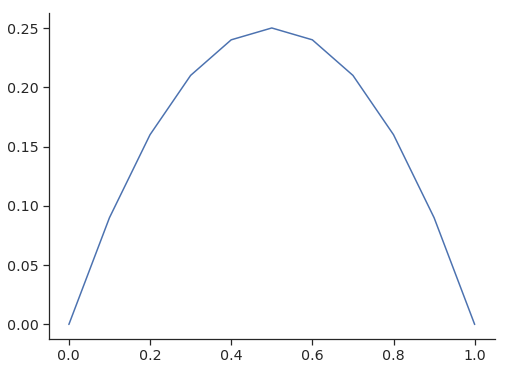

In [12]:
plt.plot(x, y);

## Loading Data

Let's load the real GDP series from FRED.

In [19]:
gdp = pd.read_excel('data/GDPCA.xls', index_col='Year')
gdp.head()

,GDP
Year,
1929-01-01,1109.448
1930-01-01,1015.058
1931-01-01,950.037
1932-01-01,827.495
1933-01-01,817.265


Now we use the `pandas` plotting interface. This makes things easier.

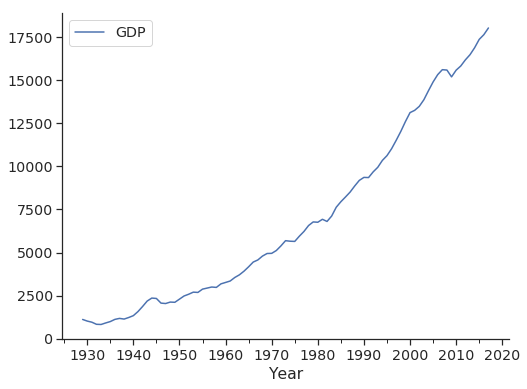

In [13]:
gdp.plot();

We can look at the difference in log values to get the growth rate.

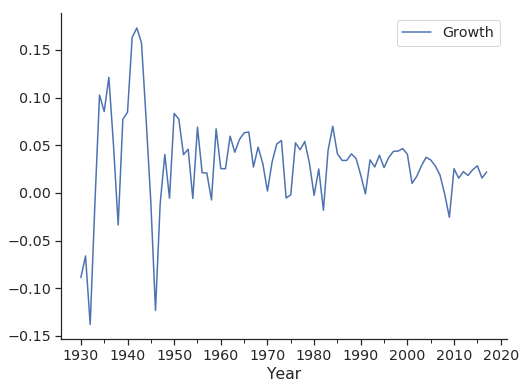

In [14]:
growth = np.log(gdp).diff()
growth = growth.rename(columns={'GDP': 'Growth'})
growth.plot();

## Complex Data

Ok, now let's look a situation with multiple data series. In this case, we'll have real GDP for multiple countries over many years. This comes from the Maddison Project's regional data.

In [18]:
mpd = pd.read_excel('data/mpd2018_region_data.xlsx', sheet_name='Long data')
mpd = mpd[['region_name', 'year', 'cgdppc']].dropna()
mpd.head()

,region_name,year,cgdppc
69,Africa,1950,1596.0
70,Africa,1951,1606.0
71,Africa,1952,1618.0
72,Africa,1953,1658.0
73,Africa,1954,1717.0


We need to get this in the right shape. Currently it's in "long" format, but we want "wide" format for plotting.

In [17]:
mpan = mpd.pivot('year', 'region_name')['cgdppc']
mpan.head()

region_name,Africa,East Asia,Eastern Europe,Latin America,Western Asia,Western Europe,Western Offshoots,World
year,,,,,,,,
1870,NaN,811.0,NaN,943.0,NaN,2480.0,3692.0,1263.0
1871,NaN,NaN,NaN,NaN,NaN,2503.0,3779.0,NaN
1872,NaN,NaN,NaN,NaN,NaN,2626.0,3839.0,NaN
1873,NaN,NaN,NaN,NaN,NaN,2654.0,3960.0,NaN
1874,NaN,NaN,NaN,NaN,NaN,2761.0,3860.0,NaN


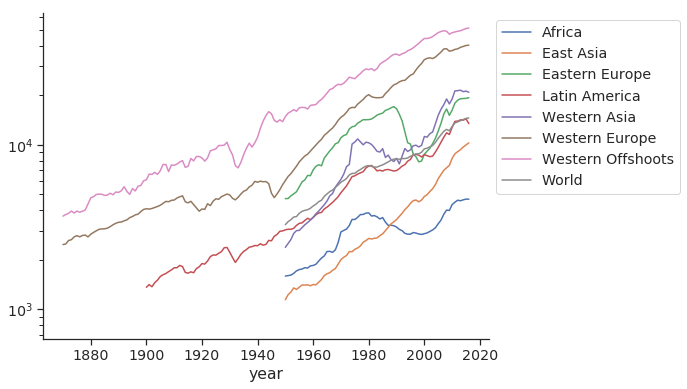

In [20]:
mpan.plot(logy=True);
plt.legend(bbox_to_anchor=(1, 1)); # this puts the legend on the side